<a href="https://colab.research.google.com/github/Rut092/End-to-End-AI-Roadmap/blob/main/Support_Vector_Regression(SVR)_Lectures_(_5rd_Notebook_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression(SVR)

## importing the Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)
print()
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


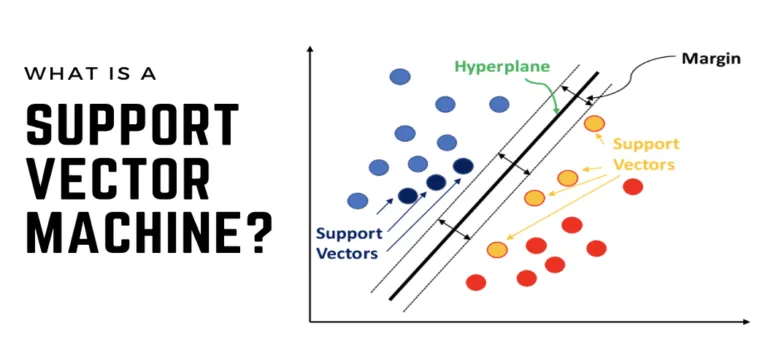

## Feature Scaling

we still will apply feature scaling to the y because we dont want svr to neglect the values

In [ ]:
# standscaler expects 2d array if we give y(1d array it will give error so convert it into 2d)

In [13]:
y = y.reshape(len(y),-1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [15]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [18]:
y = y.ravel()
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#regressor = SVR(kernel = 'rbf', epsilon=0.1) # epsilon defines the epsilon-tube within which no penalty is associated with errors.
regressor.fit(X, y)

SVR()

## Predict a new result

In [22]:
output = regressor.predict(sc_X.transform([[6.5]]))
print(output)

[-0.27861589]


In [25]:
original_output = sc_y.inverse_transform(output.reshape(-1,1))
print(original_output)

[[170370.0204065]]


## Visualising the SVR results

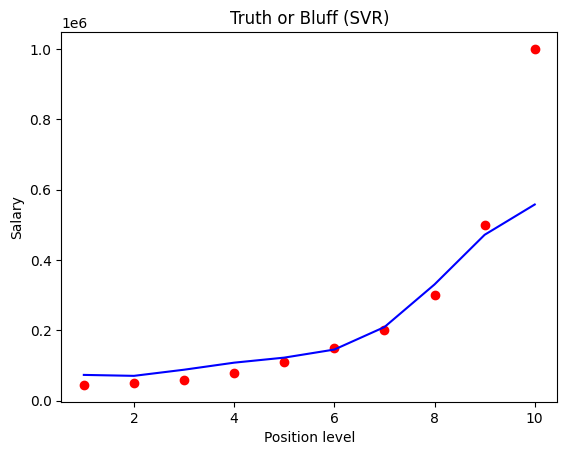

In [31]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()